<a href="https://colab.research.google.com/github/arshiabagchi/Voice-Recognition-/blob/main/voice_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the dataset path inside Google Drive
dataset_dir = "/content/drive/MyDrive/voice_recognition_dataset"

# Create the folder if it doesn’t exist
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

print(f"Dataset is stored at: {dataset_dir}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset is stored at: /content/drive/MyDrive/voice_recognition_dataset


In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import os
import base64
import wave

# Function to record audio
def record_audio(person_name, audio_count, duration=5):
    js = Javascript('''
        async function recordAudio(duration) {
            const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
            const mediaRecorder = new MediaRecorder(stream);
            let chunks = [];

            mediaRecorder.ondataavailable = event => chunks.push(event.data);
            mediaRecorder.start();

            await new Promise(resolve => setTimeout(resolve, duration * 1000));

            mediaRecorder.stop();
            await new Promise(resolve => mediaRecorder.onstop = resolve);

            const blob = new Blob(chunks, { type: 'audio/wav' });
            const reader = new FileReader();
            reader.readAsDataURL(blob);
            await new Promise(resolve => reader.onloadend = resolve);
            return reader.result;
        }
    ''')
    display(js)
    data = eval_js(f'recordAudio({duration})')
    audio_binary = base64.b64decode(data.split(',')[1])

    # Define path in Google Drive
    person_folder = os.path.join(dataset_dir, person_name)
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)

    filename = os.path.join(person_folder, f"{person_name}_{audio_count}.wav")

    # Save audio
    with open(filename, 'wb') as f:
        f.write(audio_binary)

    print(f"✅ Audio saved at: {filename}")
    print(f"🗂 Check folder: {person_folder}")

    return filename

# Function to validate the dataset (ensure each label has at least one audio file)
def validate_dataset(dataset_dir):
    class_names = sorted([f for f in os.listdir(dataset_dir) if not f.startswith('.')])

    for person_name in class_names:
        person_folder = os.path.join(dataset_dir, person_name)
        if not os.path.isdir(person_folder):
            continue

        audio_files = [f for f in os.listdir(person_folder) if f.lower().endswith('.wav')]

        if len(audio_files) == 0:
            print(f"Warning: {person_name} has no valid audio files.")
        else:
            print(f"{person_name} has {len(audio_files)} audio files.")

# Main function to capture labeled audio
def capture_labeled_audio():
    while True:
        person_name = input("Enter the person's name (or 'q' to quit): ").strip()
        if person_name.lower() == 'q':
            print("Exiting...")
            break

        print(f"Recording audio for {person_name}. Speak after clicking 'Record'.")

        audio_count = 0
        while True:
            record_audio(person_name, audio_count)
            audio_count += 1

            another = input("Record another audio sample? (y/n): ").strip().lower()
            if another != 'y':
                print(f"Finished recording audio for {person_name}.")
                break

# Run the function to start recording audio
capture_labeled_audio()

# After recording, validate the dataset
validate_dataset(dataset_dir)


Enter the person's name (or 'q' to quit): aruv
Recording audio for aruv. Speak after clicking 'Record'.


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_0.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_1.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_2.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_3.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_4.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_5.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_6.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_7.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_8.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): y


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/aruv/aruv_9.wav
🗂 Check folder: /content/drive/MyDrive/voice_recognition_dataset/aruv
Record another audio sample? (y/n): n
Finished recording audio for aruv.
Enter the person's name (or 'q' to quit): q
Exiting...
arshia has 5 audio files.
aruv has 10 audio files.


In [11]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split

dataset_dir = "/content/drive/MyDrive/voice_recognition_dataset"

# List folders (skip hidden folders like .ipynb_checkpoints)
class_names = sorted([f for f in os.listdir(dataset_dir) if not f.startswith('.')])

# Print the class names (person names) to ensure they are in the correct order
print("Class names (labels):", class_names)

# Initialize lists to store features and labels
audio_features = []
labels = []

# Loop through each person's folder and load audio files
for label, person_name in enumerate(class_names):
    person_folder = os.path.join(dataset_dir, person_name)

    if os.path.isdir(person_folder):
        # Sort the audio files to ensure correct order
        audio_files = sorted([f for f in os.listdir(person_folder) if f.lower().endswith('.wav')])

        if len(audio_files) > 0:
            for audio_name in audio_files:
                audio_path = os.path.join(person_folder, audio_name)
                # Load the audio file and extract features
                y, sr = librosa.load(audio_path, sr=22050)
                mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract 40 MFCC features
                mfcc = np.mean(mfcc, axis=1)  # Take the mean across time axis
                audio_features.append(mfcc)
                labels.append(label)
        else:
            print(f"Warning: {person_name} has no valid audio files.")
    else:
        print(f"Warning: {person_name} is not a valid directory or is empty.")

# Convert lists to NumPy arrays
audio_features = np.array(audio_features)
labels = np.array(labels)

# Verify label-audio alignment after loading the dataset
for i in range(5):  # Checking first 5 audio samples and their labels
    print(f"Audio {i}: Label = {labels[i]} -> {class_names[labels[i]]}")

# Perform a stratified split to ensure all classes are represented in both training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    audio_features, labels, test_size=0.2, random_state=42, stratify=labels
)

# After splitting, print a few label-name pairs from the training set
for i in range(5):  # Checking first 5 audio samples and their labels
    print(f"Training audio {i}: Label = {train_labels[i]}, Name = {class_names[train_labels[i]]}")

# Print shapes of the datasets
print("Training features shape:", train_features.shape)
print("Training labels shape:", train_labels.shape)
print("Testing features shape:", test_features.shape)
print("Testing labels shape:", test_labels.shape)


Class names (labels): ['arshia', 'aruv']


<ipython-input-11-aa5401c1d2f2>:30: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-aa5401c1d2f2>:30: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-aa5401c1d2f2>:30: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=22050)
/usr/local/lib/python3.11/dist-packages/li

Audio 0: Label = 0 -> arshia
Audio 1: Label = 0 -> arshia
Audio 2: Label = 0 -> arshia
Audio 3: Label = 0 -> arshia
Audio 4: Label = 0 -> arshia
Training audio 0: Label = 1, Name = aruv
Training audio 1: Label = 1, Name = aruv
Training audio 2: Label = 0, Name = arshia
Training audio 3: Label = 1, Name = aruv
Training audio 4: Label = 1, Name = aruv
Training features shape: (12, 40)
Training labels shape: (12,)
Testing features shape: (3, 40)
Testing labels shape: (3,)


In [15]:
# import matplotlib.pyplot as plt
# import librosa.display
# import IPython.display as ipd

# # Display an audio waveform from the training dataset
# plt.figure(figsize=(10, 4))
# y, sr = librosa.load(os.path.join(dataset_dir, class_names[train_labels[1]], f"{class_names[train_labels[1]]}_0.wav"), sr=22050)
# librosa.display.waveshow(y, sr=sr)
# plt.title(f"Waveform of {class_names[train_labels[1]]}")
# plt.xlabel("Time (seconds)")
# plt.ylabel("Amplitude")
# plt.grid()
# plt.show()

# # Play the audio file
# ipd.Audio(y, rate=sr)


<ipython-input-16-07666a4c4e4a>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(os.path.join(dataset_dir, class_names[train_labels[i]], f"{class_names[train_labels[i]]}_0.wav"), sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-16-07666a4c4e4a>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(os.path.join(dataset_dir, class_names[train_labels[i]], f"{class_names[train_labels[i]]}_0.wav"), sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-i

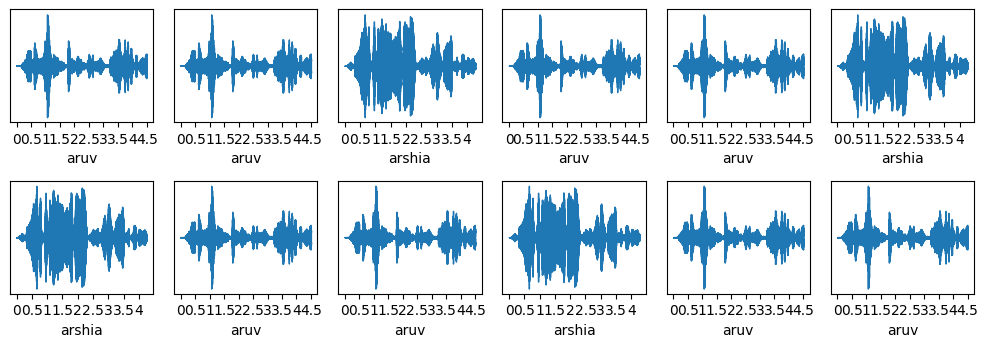

In [16]:
import matplotlib.pyplot as plt
import librosa.display

num_audios = min(len(train_features), 36)  # Limit to 36 for visualization
plt.figure(figsize=(10, 10))  # Adjust figure size

for i in range(num_audios):  # Loop through only existing audio samples
    plt.subplot(6, 6, i + 1)  # Create a 6x6 grid
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    y, sr = librosa.load(os.path.join(dataset_dir, class_names[train_labels[i]], f"{class_names[train_labels[i]]}_0.wav"), sr=22050)
    librosa.display.waveshow(y, sr=sr)
    plt.xlabel(class_names[train_labels[i]])  # Show person's name

plt.tight_layout()
plt.show()


In [17]:
import tensorflow as tf
from tensorflow import keras

# Define the model for voice recognition
model = keras.Sequential([
    keras.layers.Input(shape=(40,)),  # 40 MFCC features as input
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(64, activation='relu'),  # Another hidden layer
    keras.layers.Dense(len(class_names), activation='softmax')  # Output layer (number of classes = number of people)
])


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' for one-hot labels
              metrics=['accuracy'])

In [19]:
model.fit(train_features, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 7.5348 - val_accuracy: 0.6667 - val_loss: 4.1918
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5556 - loss: 3.7825 - val_accuracy: 0.6667 - val_loss: 5.6854
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.6667 - loss: 4.9237 - val_accuracy: 0.6667 - val_loss: 4.9540
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6667 - loss: 4.1018 - val_accuracy: 0.6667 - val_loss: 3.0421
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6667 - loss: 2.0759 - val_accuracy: 0.3333 - val_loss: 1.2466
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5556 - loss: 0.9133 - val_accuracy: 0.3333 - val_loss: 2.4718
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4444 - loss: 1.8952 - val_accuracy: 0.3333 - val_loss: 2.0095
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5556 - loss: 1.2980 - val_accuracy: 0.6667 - val_loss: 0.700

In [20]:
test_loss, test_acc = model.evaluate(test_features, test_labels, verbose=1)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0064
Test accuracy: 1.0


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Function to capture audio
def record_audio(person_name, audio_count, duration=5):
    js = Javascript('''
        async function recordAudio(duration) {
            const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
            const mediaRecorder = new MediaRecorder(stream);
            let chunks = [];

            mediaRecorder.ondataavailable = event => chunks.push(event.data);
            mediaRecorder.start();

            await new Promise(resolve => setTimeout(resolve, duration * 1000));

            mediaRecorder.stop();
            await new Promise(resolve => mediaRecorder.onstop = resolve);

            const blob = new Blob(chunks, { type: 'audio/wav' });
            const reader = new FileReader();
            reader.readAsDataURL(blob);
            await new Promise(resolve => reader.onloadend = resolve);
            return reader.result;
        }
    ''')
    display(js)
    data = eval_js(f'recordAudio({duration})')
    audio_binary = base64.b64decode(data.split(',')[1])

    # Define path in Google Drive
    dataset_dir = "/content/drive/MyDrive/voice_recognition_dataset"
    person_folder = os.path.join(dataset_dir, person_name)
    if not os.path.exists(person_folder):
        os.makedirs(person_folder)

    filename = os.path.join(person_folder, f"{person_name}_{audio_count}.wav")

    # Save audio
    with open(filename, 'wb') as f:
        f.write(audio_binary)

    print(f"✅ Audio saved at: {filename}")
    return filename

# Function to preprocess the captured audio (Extract MFCC features)
def preprocess_audio(audio_path, num_mfcc=40):
    y, sr = librosa.load(audio_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    mfcc = np.mean(mfcc, axis=1)  # Averaging MFCC features over time axis
    return mfcc

# Function to predict the person's name based on the audio
def predict_voice(model, audio, class_names):
    prediction = model.predict(np.array([audio]))  # Shape: (1, num_classes)
    print("Predicted probabilities:", prediction)
    predicted_class_index = np.argmax(prediction)  # Get index of highest probability
    predicted_class = class_names[predicted_class_index]
    return predicted_class

# Function to display the result (predicted person's name)
def show_voice_prediction(predicted_class):
    print(f"Predicted person: {predicted_class}")

# Step 1: Capture an audio file (example, replace with actual record_audio call)
captured_audio_path = record_audio('Output', 0)

# Step 2: Preprocess the captured audio
captured_audio = preprocess_audio(captured_audio_path)

# Step 3: Predict the voice
predicted_class = predict_voice(model, captured_audio, class_names)

# Step 4: Display the result
show_voice_prediction(predicted_class)


<IPython.core.display.Javascript object>

✅ Audio saved at: /content/drive/MyDrive/voice_recognition_dataset/Output/Output_0.wav


<ipython-input-26-145b3b122571>:50: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=22050)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted probabilities: [[0.7341786  0.26582137]]
Predicted person: arshia
